## Notebook for plotting sum frequencies per year

The code in the current notebook can be used to plot the summed frequency of a certain variable in a dataset per year. 

The queries that can be answered using an adapted version of the following code include but are not limited to:
* Show sum of *frequency* per *origin* per *year* for the least specific level of origin (e.g. em, gaul, italy)
* Show sum of *frequency* per *origin* per *year* for the specific level of *origin* (e.g., betica, betica, lipari)
* Show sum *'Frequency'* per *'forma_h2'* per *'Year'*

Examples of these queries can be found in the `ALANTICA_notebook.ipynb`. 


### 1. Import packages

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import figure
import numpy as np
import regex as re
sns.set()
import pathlib
from pathlib import Path
import sys
sys.path.append("../src")
from matplotlib.ticker import FormatStrFormatter
from functions import preprocess, sum_freq_per_year, year_freq_df, plot_graph, get_Y_range # module with all functions used for the task

### 2. Read in data

In [8]:
data = pd.read_excel('data/ATLANTICA_thesis_v0.2.xlsx')

### 3. Prepare data

#### 3.1 Check in which columns numeric values are of an object type
#### 3.2 If found, convert objects into numeric values (float) 
This is essential for performing math operations with these variables

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               432 non-null    int64  
 1   site             432 non-null    object 
 2   contexto         432 non-null    object 
 3   clase            432 non-null    object 
 4   produccion       432 non-null    object 
 5   origin_h1        432 non-null    object 
 6   origin_h2        432 non-null    object 
 7   forma            432 non-null    object 
 8   forma_h2         336 non-null    object 
 9   total fragmentd  432 non-null    int64  
 10  complete         29 non-null     float64
 11  rims             301 non-null    float64
 12  necks            32 non-null     float64
 13  handles          91 non-null     float64
 14  wall             234 non-null    float64
 15  bases            128 non-null    float64
 16  mni              430 non-null    float64
 17  tni             

#### 3.3 Clean text data (from punctuation, double spaces) and lowercase
This is done in order to avoid inconsistency in names and thus avoiding errors. 

In [10]:
cols_for_preprocessing = ['site', 'clase', 'produccion','origin_h1', 'origin_h2', 'forma','forma_h2']

for i in cols_for_preprocessing:
    data[i] = preprocess(data[i])

In [11]:
data.head()

,id,site,contexto,clase,produccion,origin_h1,origin_h2,forma,forma_h2,total fragmentd,complete,rims,necks,handles,wall,bases,mni,tni,start_date,end_date
0,1,laias,1,anfora,betica guadalquivir,iberianpeninsula,betica guadalquivir,haltern 70?,maritime,19,NaN,NaN,NaN,NaN,19.0,NaN,5.0,5.0,-20.0,80.0
1,2,laias,1,vajilla fina,barniz negro italico,italy,unknown,unguentario?,nan,3,NaN,NaN,NaN,NaN,3.0,NaN,2.0,2.0,-30.0,30.0
2,3,laias,1,vajilla fina,barniz negro italico,italy,unknown,indeterminada,nan,1,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,-30.0,30.0
3,4,laias,1,ceramica comun,betica,iberianpeninsula,betica,olla,roman inspired,1,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,50.0
4,5,laias,1,ceramica comun,betica,iberianpeninsula,betica,indeterminada,roman inspired,5,NaN,NaN,NaN,NaN,5.0,NaN,1.0,1.0,1.0,50.0


### 5. Create dataframes for plotting
To begin with, the data is grouped by the forma, as well as the variable of interest. This grouping can e.g., be made by origin (both origin_h1 and origin_h2).

In the below code, only alterations needs to be made in the first line to fit the query. Here it is specified which variable to group by. Here you also specify if you want the frequency mni or tni or both.

`df0 = data.groupby(['the_name_of_the_variable_you_want_to_group_by', 'forma', 'start_date', 'end_date'])['mni'].sum()`

In [12]:
df0 = data.groupby(['origin_h1', 'forma', 'start_date', 'end_date'])['tni', 'mni'].apply(lambda x : x.sum())
df0 = df0.reset_index()
df0.head()

C:\Users\alba_\AppData\Local\Temp/ipykernel_20080/2463320105.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df0 = data.groupby(['origin_h1', 'forma', 'start_date', 'end_date'])['tni', 'mni'].apply(lambda x : x.sum())


,origin_h1,forma,start_date,end_date,tni,mni
0,gaul,drag. 15/17,30.0,100.0,4.0,3.0
1,gaul,drag. 18,30.0,100.0,1.0,1.0
2,gaul,drag. 27,30.0,100.0,9.0,8.0
3,gaul,drag. 29,30.0,100.0,2.0,2.0
4,gaul,drag. 33,30.0,100.0,1.0,1.0


The next chunks illustrate how to calculate the summed frequcnty per year. One should specify frequency value in a `sum_freq` argument (tni or mni).

The `sum_freq_per_year` can be used for any number of frequency values. Each run creates a new column in the existing dataframe. The name of the column can be specified with parameter `freq_per_year`.

See examples below. 

In [13]:
df1 = sum_freq_per_year(data = df0,
                        sum_freq = 'tni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_tni')
df1.head()

,origin_h1,forma,start_date,end_date,tni,mni,sum_freq_per_year_tni
0,gaul,drag. 15/17,30.0,100.0,4.0,3.0,0.057143
1,gaul,drag. 18,30.0,100.0,1.0,1.0,0.014286
2,gaul,drag. 27,30.0,100.0,9.0,8.0,0.128571
3,gaul,drag. 29,30.0,100.0,2.0,2.0,0.028571
4,gaul,drag. 33,30.0,100.0,1.0,1.0,0.014286


In [14]:
df1 = sum_freq_per_year(data = df0,
                        sum_freq = 'mni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_mni')
df1.head()

,origin_h1,forma,start_date,end_date,tni,mni,sum_freq_per_year_tni,sum_freq_per_year_mni
0,gaul,drag. 15/17,30.0,100.0,4.0,3.0,0.057143,0.042857
1,gaul,drag. 18,30.0,100.0,1.0,1.0,0.014286,0.014286
2,gaul,drag. 27,30.0,100.0,9.0,8.0,0.128571,0.114286
3,gaul,drag. 29,30.0,100.0,2.0,2.0,0.028571,0.028571
4,gaul,drag. 33,30.0,100.0,1.0,1.0,0.014286,0.014286


### 6. Create a dataframe for each level of the variable
This needs to be done for all the levels of the variable that should be included in the final plot. 

If for example, you want three different origins, three different frequency dataframes should be made. 

It is also possible to plot a line which sums  serveral levels of the variable. This can be done using the following syntax (make sure indentations match):
```
dataframe = year_freq_df(df1[(df1['origin_h1'] == 'italy') | (df1['origin_h1'] == 'gaul')], 
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        sum_freq = 'sum_freq_per_year_tni')
```

Futhermore, this is the code where it is specified which of the two types of frequencies should be plotted. This is done by altering the `sum_freq`. It can be set to either `'sum_freq_per_year_tni'` or `'sum_freq_per_year_mni'` 

In [15]:
gaul = year_freq_df(data = df1[df1['origin_h1'] == 'gaul'],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_tni')  # param for changing which frequency type to use 

italy = year_freq_df(data = df1[df1['origin_h1'] == 'italy'], 
                     lower_date = 'start_date',
                     upper_date = 'end_date',
                     sum_freq = 'sum_freq_per_year_tni')
                      
iberian = year_freq_df(data = df1[df1['origin_h1'] == 'iberianpeninsula'], 
                       lower_date = 'start_date',
                       upper_date = 'end_date',
                       sum_freq = 'sum_freq_per_year_mni') 


### 7. Plot the graphs

#### 7.1. Create a dictionary for plotting
Now a dictionary containing the above dataframes is made. The keys (what is incapsulated in ' ') are going to be the labels for the plot. The variables refered to, are the dataframes created just above. 

In [16]:
df_dictionary = {'Gaul': gaul, 'Italy': italy, 'Iberian': iberian}

In [17]:
df_dictionary2 = {'Gaul': gaul, 'Iberian': iberian}

#### 7.2. Plot and save

Here the data from the previously created count data frames are plotted. 

This is done using the function `plotgraph()`. 

To change the colour of lines, pass a list of strings with colour names to `palette` argument. 

To change the default `'solid'` line, pass f.ex., `'dashed'` to `linestyle` argument.

To hide values on axis uncomment `ax.axes.xaxis.set_ticks([])` for X and `ax.axes.yaxis.set_ticks([])` for Y.

To plot a single line graph specify only 1 axes in this line `fig, ax = plt.subplots(figsize=(20, 11))` and use this `ax` variable as an input for `ax` argument in `plotgraph()`. 
To plot 2 and more graphs side by side:
1. specify that many axes as graphs and the respective number of rows/columns of the subplot grid. F.ex., to plot 2 lie=ne graphs `fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20, 11))`
2. call `plot_graph()` on each `dictionary` and use the respective `ax` variable as an input for `ax` argument in `plotgraph()`.  
F.ex., in `plot_graph(dicts_of_df = df_dictionary, palette=['green', 'yellow', 'black'], linestyle = 'dashed', ax = ax1)` the line graph for dic with Gaul, Italy and Iberian will be refered as `ax1` and placed on the **right** side of the graph.

**Note**: Remember to set labels, background colour, etc for both axes like in the example below.

C:\Users\alba_\AppData\Local\Temp/ipykernel_20080/267352195.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


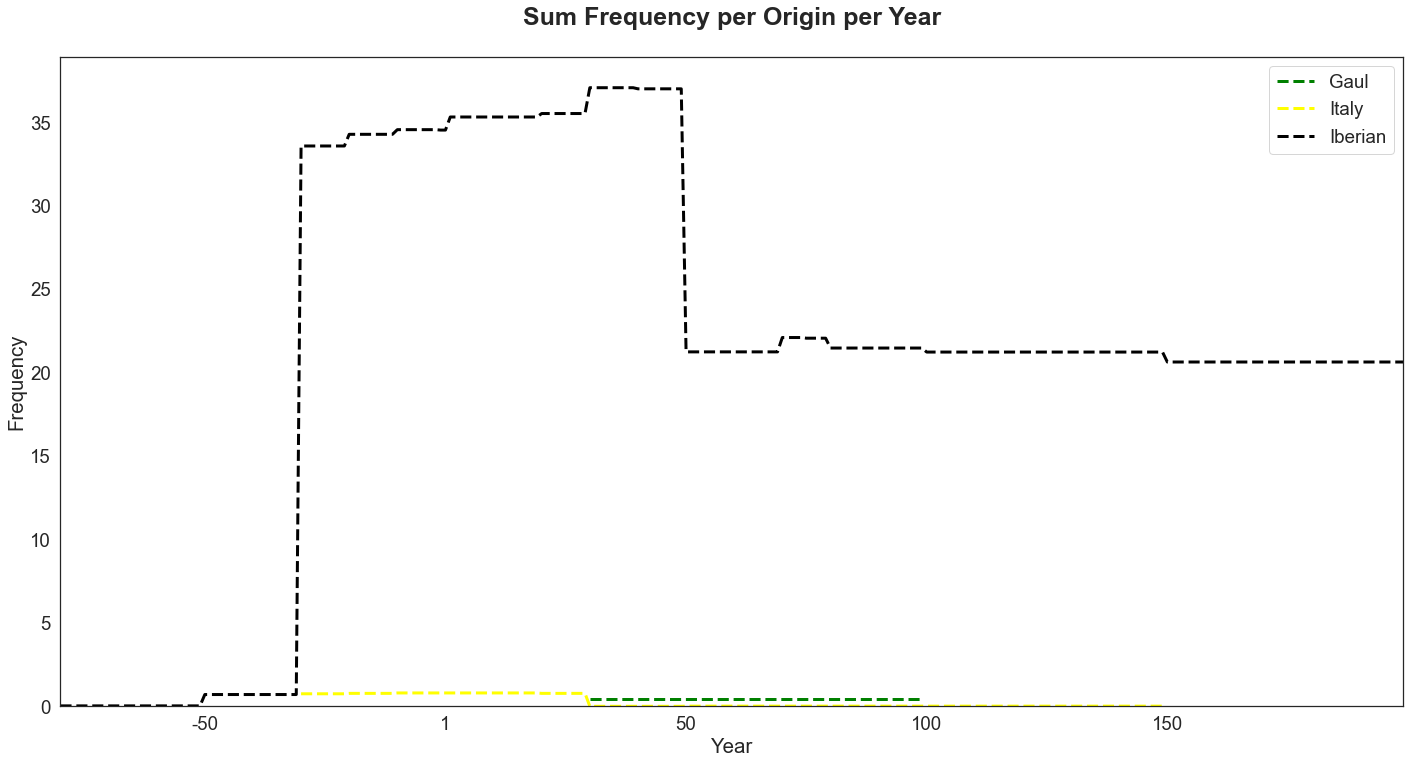

In [18]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['green', 'yellow', 'black'],  
           linestyle = 'dashed',
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'Sum Frequency per Origin per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()


# Save the graph
plt.savefig('./Frequency_per_year.pdf')

C:\Users\alba_\AppData\Local\Temp/ipykernel_20080/629580620.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])
C:\Users\alba_\AppData\Local\Temp/ipykernel_20080/629580620.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])


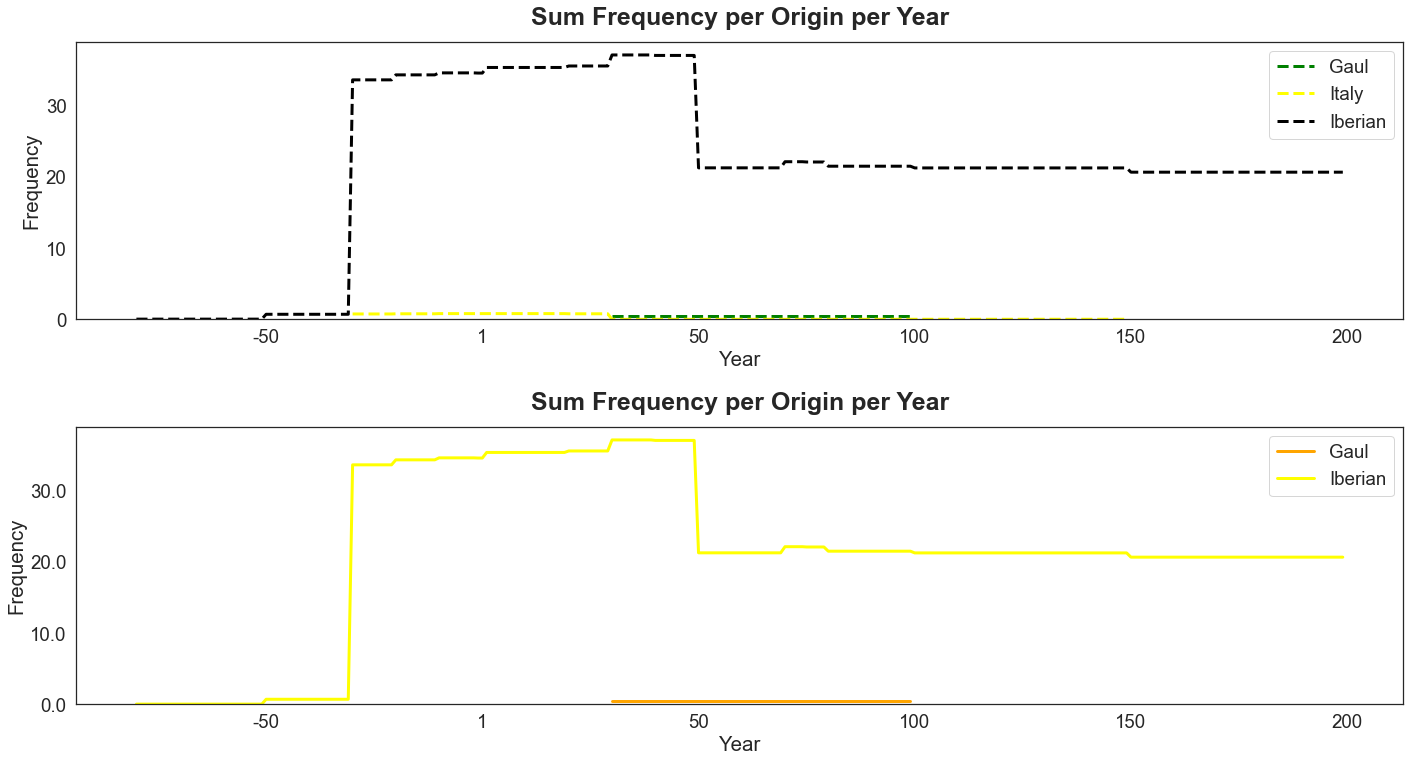

In [19]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1, figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum1, maximum1 = get_Y_range(df_dictionary)
minimum2, maximum2 = get_Y_range(df_dictionary2)

plot_graph(dicts_of_df = df_dictionary,
           palette=['green', 'yellow', 'black'],  
           linestyle = 'dashed',
           ax = ax1)
           
plot_graph(dicts_of_df = df_dictionary2,
           palette=['orange', 'yellow',],  
           linestyle = 'solid',
           ax = ax2)

## Remove 0 from Y axis
ax1.set_ylim(0, None)
ax2.set_ylim(0, None)

#Change background colour
ax1.set_facecolor("white")  
ax2.set_facecolor("white")

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax1.set_ylabel("Frequency")
ax1.set_xlabel("Year")

ax2.set_ylabel("Frequency")
ax2.set_xlabel("Year")

#To hide values on axis
#ax1.axes.xaxis.set_ticks([])
#ax1.axes.yaxis.set_ticks([])
#ax2.axes.xaxis.set_ticks([])
#ax2.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])
ax2.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])

ax1.set_title(label = 'Sum Frequency per Origin per Year', size=25, y=1.04, fontweight='bold')

ax2.set_title(label = 'Sum Frequency per Origin per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()

# Save the graph
plt.savefig('./Frequency_per_year1.pdf')